## DESCRIPTION: BY LEVERAGING DATA FROM DATA.GOV, PERFORMED EDA FOR MY DATA SET ANALYZING YOUTH TOBACCO USAGE TO UNCOVER PATTERNS, TRENDS, AND HEALTH IMPACTS RELATED TO EARLY TOBACCO USE.  
## I WANT MY NAME ASSOCIATED WITH THE NOTEBOOK 
## DATA SOURCE LINK: https://data.cdc.gov/api/views/4juz-x2tp/rows.csv?accessType=DOWNLOAD

## IMPORTED NECESSARY LIBRARIES

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOADED THE DATASET 

In [18]:
file_path = 'Youth_Tobacco_Survey__YTS__Data.csv'
data = pd.read_csv(file_path)

## DISPLAYS THE SHAPE, COLUMN NAMES, AND FIRST FEW ROWS OF THE DATASET FOR INITIAL INSPECTION

In [19]:
print("Dataset Shape:", data.shape)
print("Columns:", data.columns.tolist())
print("\nSample Data:\n", data.head())

Dataset Shape: (10600, 31)
Columns: ['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc', 'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size', 'Gender', 'Race', 'Age', 'Education', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId', 'StratificationID1', 'StratificationID2', 'StratificationID3', 'StratificationID4', 'SubMeasureID', 'DisplayOrder']

Sample Data:
    YEAR LocationAbbr   LocationDesc                  TopicType  \
0  2004           OH           Ohio  Tobacco Use – Survey Data   
1  2008           AL        Alabama  Tobacco Use – Survey Data   
2  2015           WV  West Virginia  Tobacco Use – Survey Data   
3  2005           IL       Illinois  Tobacco Use – Survey Data   
4  2005           CT    Connecticut  Tobacco Use – Survey Data   

                       TopicDesc     MeasureD

## COUNTS AND DISPLAYS THE NUMBER OF MISSING VALUES FOR EACH COLUMN IN THE DATASET

In [21]:
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 YEAR                              0
LocationAbbr                      0
LocationDesc                      0
TopicType                         0
TopicDesc                         0
MeasureDesc                       0
DataSource                        0
Response                       2410
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value                      520
Data_Value_Footnote_Symbol    10083
Data_Value_Footnote           10083
Data_Value_Std_Err              520
Low_Confidence_Limit            517
High_Confidence_Limit           520
Sample_Size                     520
Gender                            0
Race                              0
Age                               0
Education                         0
GeoLocation                       4
TopicTypeId                       0
TopicId                           0
MeasureId                         0
StratificationID1                 0
StratificationID2                 0
Stratifica

##  DISPLAYED THE DATA TYPES OF EACH COLUMN TO UNDERSTAND THE STRUCTURE OF THE DATASET

In [22]:
data_types = data.dtypes
print("\nData Types:\n", data_types)


Data Types:
 YEAR                            int64
LocationAbbr                   object
LocationDesc                   object
TopicType                      object
TopicDesc                      object
MeasureDesc                    object
DataSource                     object
Response                       object
Data_Value_Unit                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Data_Value_Std_Err            float64
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Gender                         object
Race                           object
Age                            object
Education                      object
GeoLocation                    object
TopicTypeId                    object
TopicId                        object
MeasureId                      object
StratificationID1              objec

## DISPLAYS SUMMARY, STATISTICS OF KEY COLUMNS

In [23]:
key_columns = ['YEAR', 'LocationDesc', 'TopicDesc', 'MeasureDesc', 'Response', 
               'Data_Value', 'Sample_Size', 'Gender', 'Race', 'Age', 'Education']
subset_data = data[key_columns]
print("\nSummary Statistics:\n", subset_data.describe(include='all'))


Summary Statistics:
                 YEAR LocationDesc              TopicDesc     MeasureDesc  \
count   10600.000000        10600                  10600           10600   
unique           NaN           50                      3               4   
top              NaN  Mississippi  Cigarette Use (Youth)  Smoking Status   
freq             NaN          651                   4107            4107   
mean     2007.053491          NaN                    NaN             NaN   
std         5.462656          NaN                    NaN             NaN   
min      1999.000000          NaN                    NaN             NaN   
25%      2002.000000          NaN                    NaN             NaN   
50%      2006.000000          NaN                    NaN             NaN   
75%      2011.000000          NaN                    NaN             NaN   
max      2017.000000          NaN                    NaN             NaN   

       Response    Data_Value   Sample_Size   Gender       Race  

## IDENTIFIES DUPLICATE ROWS

In [24]:
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")
data = data.drop_duplicates()


Number of Duplicate Rows: 0


## REMOVES ROWS WITH MISSING 'DATA_VALUE' AND DISPLAYS THE SHAPE OF THE CLEANED DATASET

In [25]:
cleaned_data = data.dropna(subset=['Data_Value'])
print("\nCleaned Dataset Shape:", cleaned_data.shape)


Cleaned Dataset Shape: (10080, 31)


## VISUALIZATIONS FOR MY DATA 

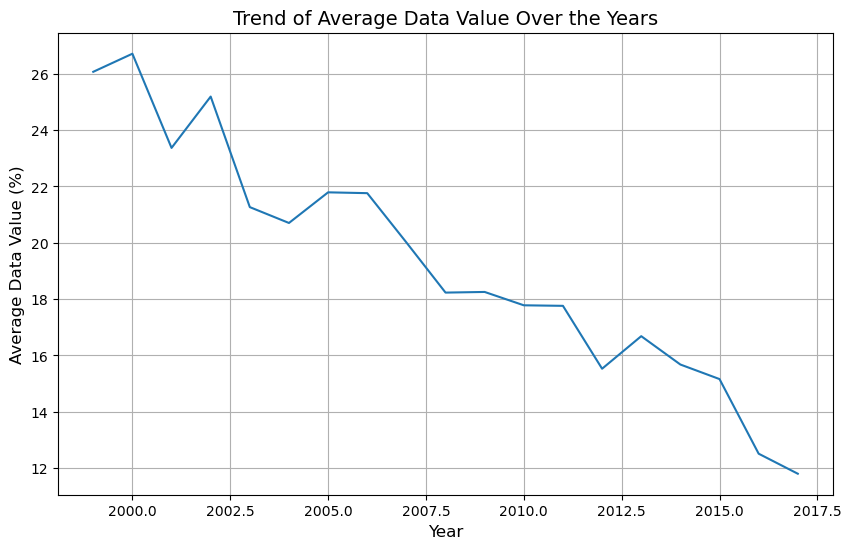

In [32]:
# Visualization 1: Trend of Average Data Value Over the Years
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleaned_data, x='YEAR', y='Data_Value', estimator='mean', errorbar=None)
plt.title('Trend of Average Data Value Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Data Value (%)', fontsize=12)
plt.grid(True)
plt.show()

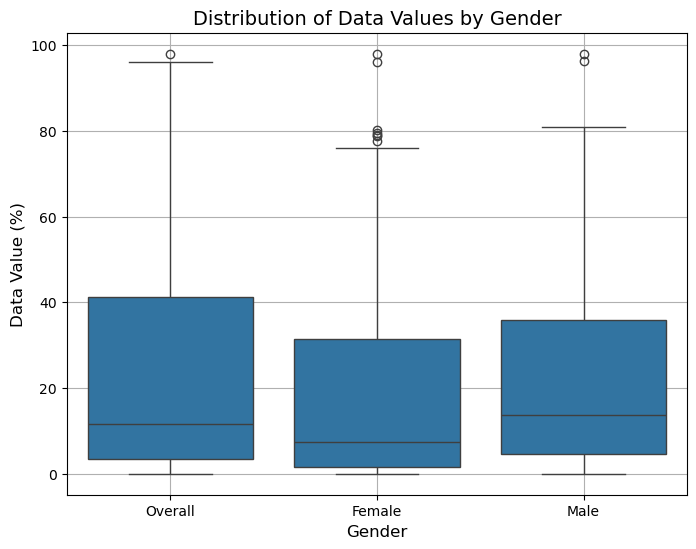

In [27]:
# Visualization 2: Distribution of Data Values by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_data, x='Gender', y='Data_Value')
plt.title('Distribution of Data Values by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Data Value (%)', fontsize=12)
plt.grid(True)
plt.show()

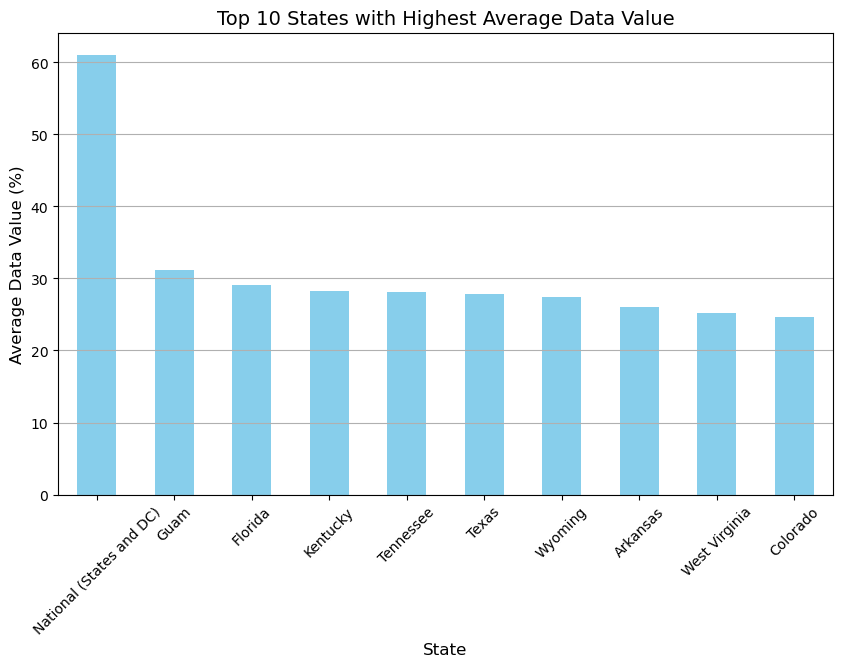

In [28]:
# Visualization 3: Top 10 States with Highest Average Data Value
state_avg = cleaned_data.groupby('LocationDesc')['Data_Value'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
state_avg.plot(kind='bar', color='skyblue')
plt.title('Top 10 States with Highest Average Data Value', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Data Value (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## HYPOTHESIS MADE BASED ON THE DATA SET 

## Hypothesis 1: States with higher education levels report lower youth tobacco use percentages

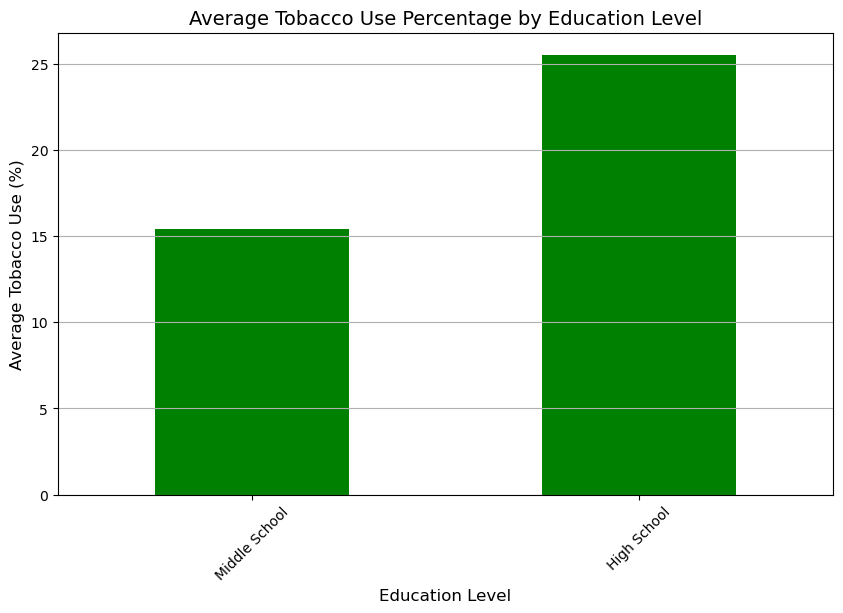

In [29]:
education_avg = cleaned_data.groupby('Education')['Data_Value'].mean().sort_values()
plt.figure(figsize=(10, 6))
education_avg.plot(kind='bar', color='green')
plt.title('Average Tobacco Use Percentage by Education Level', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Tobacco Use (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

from scipy.stats import pearsonr

## OBSERVATION: THE BAR PLOT OF AVERAGE TOBACCO USE BY EDUCATION LEVEL SUGGESTS THAT TOBACCO USE IS MORE PREVALENT AMONG INDIVIDUALS WITH HIGH SCHOOL OF EDUCATION LEVELS. THIS COULD INDICATE THAT YOUNGER INDIVIDUALS, PARTICULARLY THOSE STILL IN MIDDLE SCHOOL OR HIGH SCHOOL, MAY BE AT HIGHER RISK OF TOBACCO USE.

## HYPOTHESIS 2: PERCENTAGE OF FREQUENT TOBACCO USERS INCREASES WITH LARGER SAMPLE SIZE

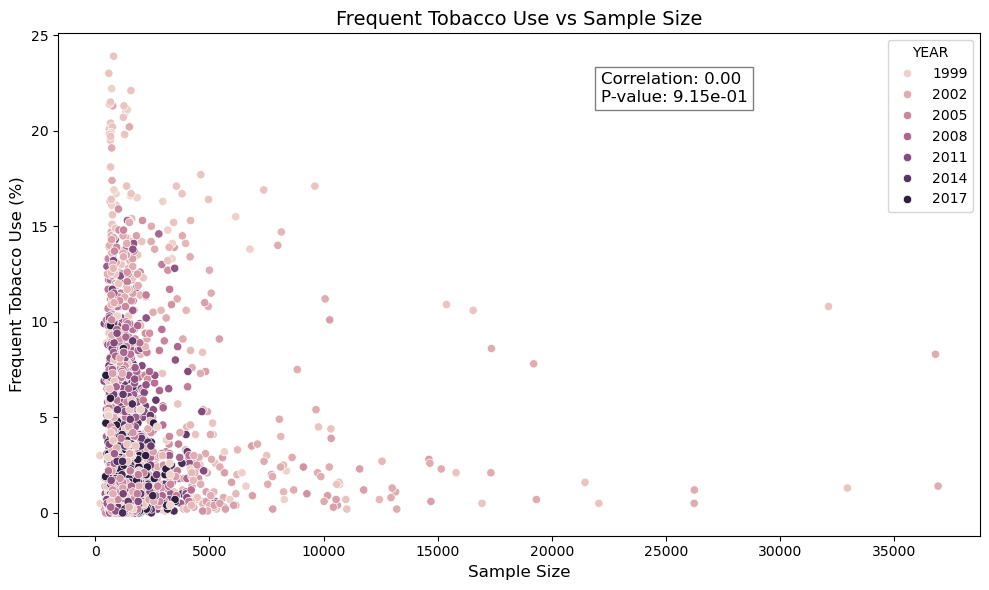

In [30]:
# Filter for relevant tobacco use categories in the 'Response' column, e.g., "Frequent"
frequent_users = cleaned_data[cleaned_data['Response'] == 'Frequent']

# Create the scatter plot for Frequent Tobacco Use vs Sample Size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=frequent_users, x='Sample_Size', y='Data_Value', hue='YEAR')
plt.title('Frequent Tobacco Use vs Sample Size', fontsize=14)
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Frequent Tobacco Use (%)', fontsize=12)

# Calculate correlation for Hypothesis 2 using Pearson correlation
corr, p_value = pearsonr(frequent_users['Sample_Size'], frequent_users['Data_Value'])

# Add the correlation and p-value to the plot
plt.text(
    max(frequent_users['Sample_Size']) * 0.6, 
    max(frequent_users['Data_Value']) * 0.9, 
    f'Correlation: {corr:.2f}\nP-value: {p_value:.2e}', 
    fontsize=12, 
    bbox=dict(facecolor='white', alpha=0.5)
)

plt.tight_layout()
plt.show()

## OBSERVATION: The scatter figure, with a correlation coefficient of 0.00, shows that the percentage of people who smoke frequently and sample size do not significantly correlate. There is no statistical significance and any observed association is just the result of chance, according to the p-value (0.915). Regardless of sample size, data points from 1999 to 2017 exhibit same clustering patterns, with the bulk of frequent tobacco usage percentages falling below 10%. There is no consistent pattern in the dataset that links sample size to the frequency of tobacco use, even if the density of points varies by year.